/Users/being/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
100%|██████████| 6.73M/6.73M [00:01<00:00, 4.35MB/s]

100%|██████████| 476k/476k [00:00<00:00, 887kB/s] 
image 1/1 /Users/being/Desktop/workspace2024/PALCON/src/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 89.1ms
Speed: 5.1ms preprocess, 89.1ms inference, 18.4ms postprocess per image at shape (1, 3, 640, 480)


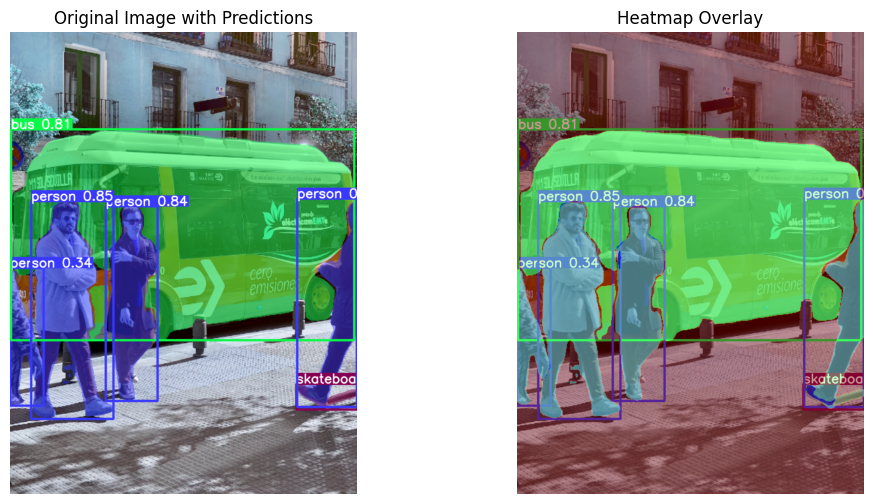

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

# Get the image with predictions
img = results[0].plot()

# Create a heatmap
heatmap = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

# Overlay the prediction masks onto the heatmap
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask = mask.cpu().numpy().squeeze()  # Convert mask to numpy array and remove single-dimensional entries
        mask_resized = cv2.resize(mask, (heatmap.shape[1], heatmap.shape[0]))  # Resize mask to match heatmap size
        heatmap = cv2.add(heatmap, mask_resized.astype(np.float32))

# Normalize the heatmap
heatmap = cv2.normalize(heatmap, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Convert heatmap to RGB
heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Combine the original image with the heatmap
overlay_img = cv2.addWeighted(img, 0.6, heatmap_img, 0.4, 0)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image with Predictions')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Heatmap Overlay')
plt.imshow(overlay_img)
plt.axis('off')

plt.show()

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolov8n-seg.pt")  # load an official model

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture image.")
        break

    # Perform prediction
    results = model(frame)

    # Get the image with predictions
    img = results[0].plot()

    # Create a heatmap
    heatmap = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

    # Overlay the prediction masks onto the heatmap
    if results[0].masks is not None:
        for mask in results[0].masks.data:
            mask = mask.cpu().numpy().squeeze()  # Convert mask to numpy array and remove single-dimensional entries
            mask_resized = cv2.resize(mask, (heatmap.shape[1], heatmap.shape[0]))  # Resize mask to match heatmap size
            heatmap = cv2.add(heatmap, mask_resized.astype(np.float32))

    # Normalize the heatmap
    heatmap = cv2.normalize(heatmap, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # Convert heatmap to RGB
    heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Combine the original image with the heatmap
    overlay_img = cv2.addWeighted(img, 0.6, heatmap_img, 0.4, 0)

    # Display the result
    cv2.imshow('Original Image with Predictions', img)
    cv2.imshow('Heatmap Overlay', overlay_img)

    # Press 'q' to quit the webcam stream
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

2024-06-10 13:29:49.838 Python[61117:1036783] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.

0: 384x640 (no detections), 84.9ms
Speed: 2.2ms preprocess, 84.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
2024-06-10 13:29:52.252 Python[61117:1036783] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.

0: 384x640 (no detections), 79.9ms
Speed: 3.2ms preprocess, 79.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.6ms
Speed: 1.7ms preprocess, 49.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.3ms
Speed: 1.4ms preprocess, 50.3ms i

Error: Failed to capture image.
